# Land classification

In this notebook we will explore some techniques for classifying land-cover in satellite images. Using data from the European Space Agency's Sentinel 2 Mission, you will apply machine learning algorithms for identifying areas of vegetation in an urban area.

## Satellite images

The Sentinel-2 satellites are 'Multi Spectral Imaging' Satellites.

- some description of the dataset/links to sentinel/ orbit info

## Why classify land cover?

many reasons:

- in this project to identify areas of vegetation within an Urban environment


In [1]:
from sentinel_funcs import *
# read in the dataset
im1 = np.load('data/satellite_data.npy')

## The dataset
The data are provided as atmospherically-corrected values. The dataset is a 3D array of size 1000 x 1000 x 4, providing you with 4 bands: Blue, Green, Red, Infrared. Each pixel is exactly 10m x 10m

In [2]:
print('Array dimensions: {}'.format(im1.shape))

Array dimensions: (1000, 1000, 4)


In [3]:
pixel_size = 10

## RGB images
What does this mean?
Can you identify different areas manually?
What area are you looking at?


Clue: the image is located somewhere in this area: https://tinyurl.com/yb43aerz

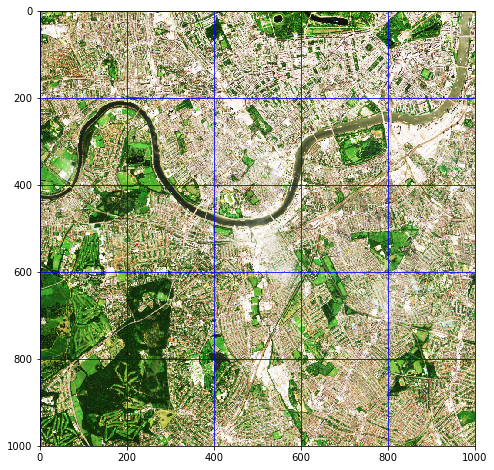

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(image_histogram_equalization(im1[:,:,:3]))
plt.grid(color='blue')
plt.show()

What features are present?
Can we work out how much green space there is from the RGB information?

# Individual colour channels

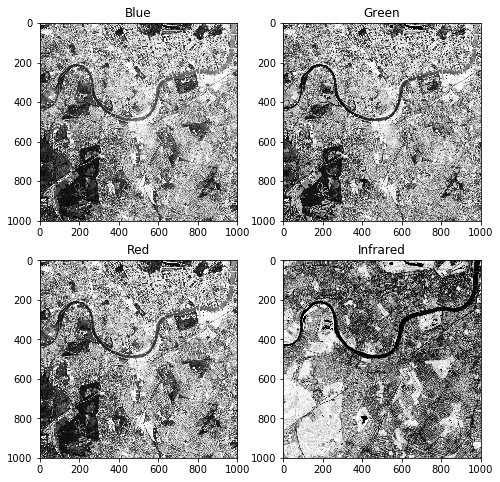

In [5]:
f = plt.figure(figsize=(8,8))
f.add_subplot(221)
plt.imshow(image_histogram_equalization(im1[:,:,0]),'binary_r')
plt.title('Blue')
f.add_subplot(222)
plt.imshow(image_histogram_equalization(im1[:,:,1]),'binary_r')
plt.title('Green')
f.add_subplot(223)
plt.imshow(image_histogram_equalization(im1[:,:,2]),'binary_r')
plt.title('Red')
f.add_subplot(224)
plt.imshow(image_histogram_equalization(im1[:,:,3]),'binary_r')
plt.title('Infrared')
plt.show()

## Using band ratio
Each pixel in our dataset is made up of 4 values. These values represent how bright the surface was in each of the four colour bands (blue, green, red, infrared). Band 1 is the blue band. A high value in the blue band means that the surface reflected lots of blue light back to the sensor onboard the satellite. Conversely, if we had a low value, we would know that the surface would be less reflective in the blue.

Usually, we aren't interested in the absolute brightness and so we prefer to use the ratios of brightness between bands.

For example, we can calculate a reflectance (R) ratio called the 'Normalised Differential Vegetation Index':

$R_{NDVI}=(R_{IR}-R_{Red})/(R_{IR}+R_{Red})$

This ignores the overall brightness and just indicates the relative difference in reflectance between the 2 wavebands.

Lets see what happens if we calculate this for the image:

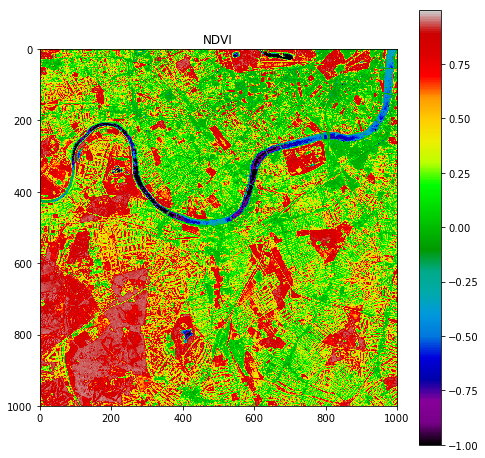

In [6]:
# calculate NDVI
ndvi = calculate_NDVI(im1)

# plot
plt.figure(figsize=(8,8))
plt.imshow(ndvi,'nipy_spectral')
plt.title('NDVI')
plt.colorbar()
plt.show()

Why is the water so easy to identify using NDVI?

How could we estimate the area of vegetation?

## Thresholding

In [7]:
water_threshold = -.25
vegetation_threshold = .5

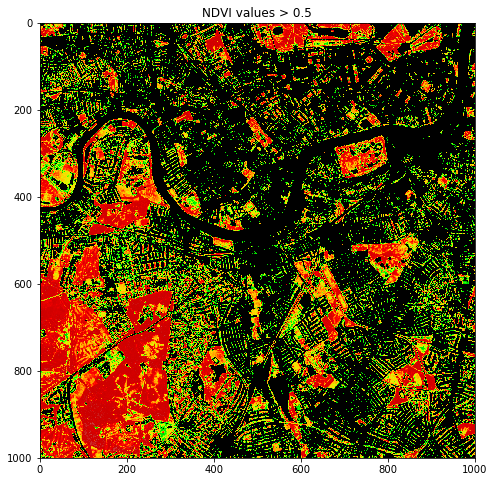

In [8]:
# threshold the ndvi image array
mask = ndvi > vegetation_threshold

# calculate the area above threshold in km2
area = (mask.sum()*10)/1e6

# plot
plt.figure(figsize=(8,8))
plt.imshow(mask*ndvi,'nipy_spectral')
plt.title('NDVI values > {}'.format(vegetation_threshold))
plt.show()

## Small scale investigations

In [9]:
park = im1[700:900,300:500]
park_ndvi = calculate_NDVI(park)

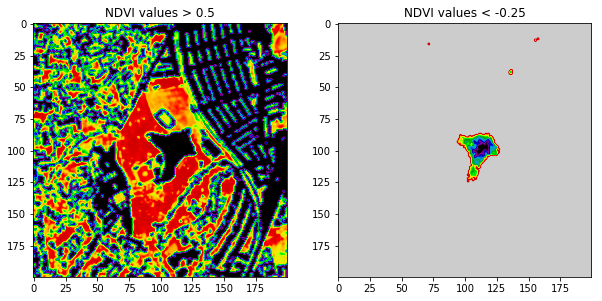

In [10]:
threshold = .5

# threshold the ndvi image array
mask = park_ndvi > threshold

# calculate the area above threshold in km2
area = (mask.sum()*10)/1e6

# plot
f = plt.figure(figsize=(10,5))
f.add_subplot(121)
plt.imshow(mask*park_ndvi,'nipy_spectral',interpolation='bicubic')
plt.title('NDVI values > {}'.format(threshold))


threshold = -.25

# threshold the ndvi image array
mask = park_ndvi < threshold

# calculate the area above threshold in km2
area = (mask.sum()*10)/1e6

# plot
f.add_subplot(122)
plt.imshow(mask*park_ndvi,'nipy_spectral',interpolation='bicubic')
plt.title('NDVI values < {}'.format(threshold))
plt.show()

### Exercise 1

What percentage of this part of London is vegetation?

### Exercise 2

Choose an area in the satellite images, find this area on the ground and investigate how we can use different colourbands for estimating the area of different landcover types
